In [1]:
import numpy as np
import GPy
from pylab import *
%matplotlib inline
import os
from sys import path
sys.path.insert(0, '/Users/sabhya/Documents/PyDeepGP')
import deepgp
import pylab as pb

In [2]:
np.random.seed(42)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("/Users/sabhya/Documents/PyDeepGP/weatherAUS_cleaned.csv", index_col="Date")
df_melb = df[df.Location == "Melbourne"].copy().drop(columns=["Location", "Latitude", "Longitude"])

df_melb.head()


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Temp,RainToday,RISK_MM,RainTomorrow,is9AM
Date,,,,,,,,,,,,,,
2008-07-01,9.5,15.4,2.0,12.0,63.0,12.0,37.0,60.0,1006.8,11.0,1,0.6,0,1
2008-07-02,11.0,14.5,0.6,12.0,63.0,12.0,30.0,66.0,1013.4,11.8,0,1.4,1,1
2008-07-03,8.4,14.1,1.4,12.0,39.0,12.0,17.0,72.0,1024.8,10.6,1,0.6,0,1
2008-07-04,9.1,14.5,0.6,4.0,19.0,15.0,9.0,87.0,1030.2,10.2,0,0.0,0,1
2008-07-05,4.3,15.5,0.0,0.0,52.0,0.0,24.0,81.0,1028.9,5.5,0,0.0,0,1


In [5]:
df_melb['MinTempK'] = 0
df_melb['MaxTempK'] = 0
df_melb.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Temp,RainToday,RISK_MM,RainTomorrow,is9AM,MinTempK,MaxTempK
Date,,,,,,,,,,,,,,,,
2008-07-01,9.5,15.4,2.0,12.0,63.0,12.0,37.0,60.0,1006.8,11.0,1,0.6,0,1,0,0
2008-07-02,11.0,14.5,0.6,12.0,63.0,12.0,30.0,66.0,1013.4,11.8,0,1.4,1,1,0,0
2008-07-03,8.4,14.1,1.4,12.0,39.0,12.0,17.0,72.0,1024.8,10.6,1,0.6,0,1,0,0
2008-07-04,9.1,14.5,0.6,4.0,19.0,15.0,9.0,87.0,1030.2,10.2,0,0.0,0,1,0,0
2008-07-05,4.3,15.5,0.0,0.0,52.0,0.0,24.0,81.0,1028.9,5.5,0,0.0,0,1,0,0


In [6]:
df_melb.MinTempK= df_melb.MinTemp + 273
df_melb.MaxTempK = df_melb.MaxTemp + 273
df_melb = df_melb.drop(columns=['MinTemp', 'MaxTemp'])

df_melb.head()



,Rainfall,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Temp,RainToday,RISK_MM,RainTomorrow,is9AM,MinTempK,MaxTempK
Date,,,,,,,,,,,,,,
2008-07-01,2.0,12.0,63.0,12.0,37.0,60.0,1006.8,11.0,1,0.6,0,1,282.5,288.4
2008-07-02,0.6,12.0,63.0,12.0,30.0,66.0,1013.4,11.8,0,1.4,1,1,284.0,287.5
2008-07-03,1.4,12.0,39.0,12.0,17.0,72.0,1024.8,10.6,1,0.6,0,1,281.4,287.1
2008-07-04,0.6,4.0,19.0,15.0,9.0,87.0,1030.2,10.2,0,0.0,0,1,282.1,287.5
2008-07-05,0.0,0.0,52.0,0.0,24.0,81.0,1028.9,5.5,0,0.0,0,1,277.3,288.5


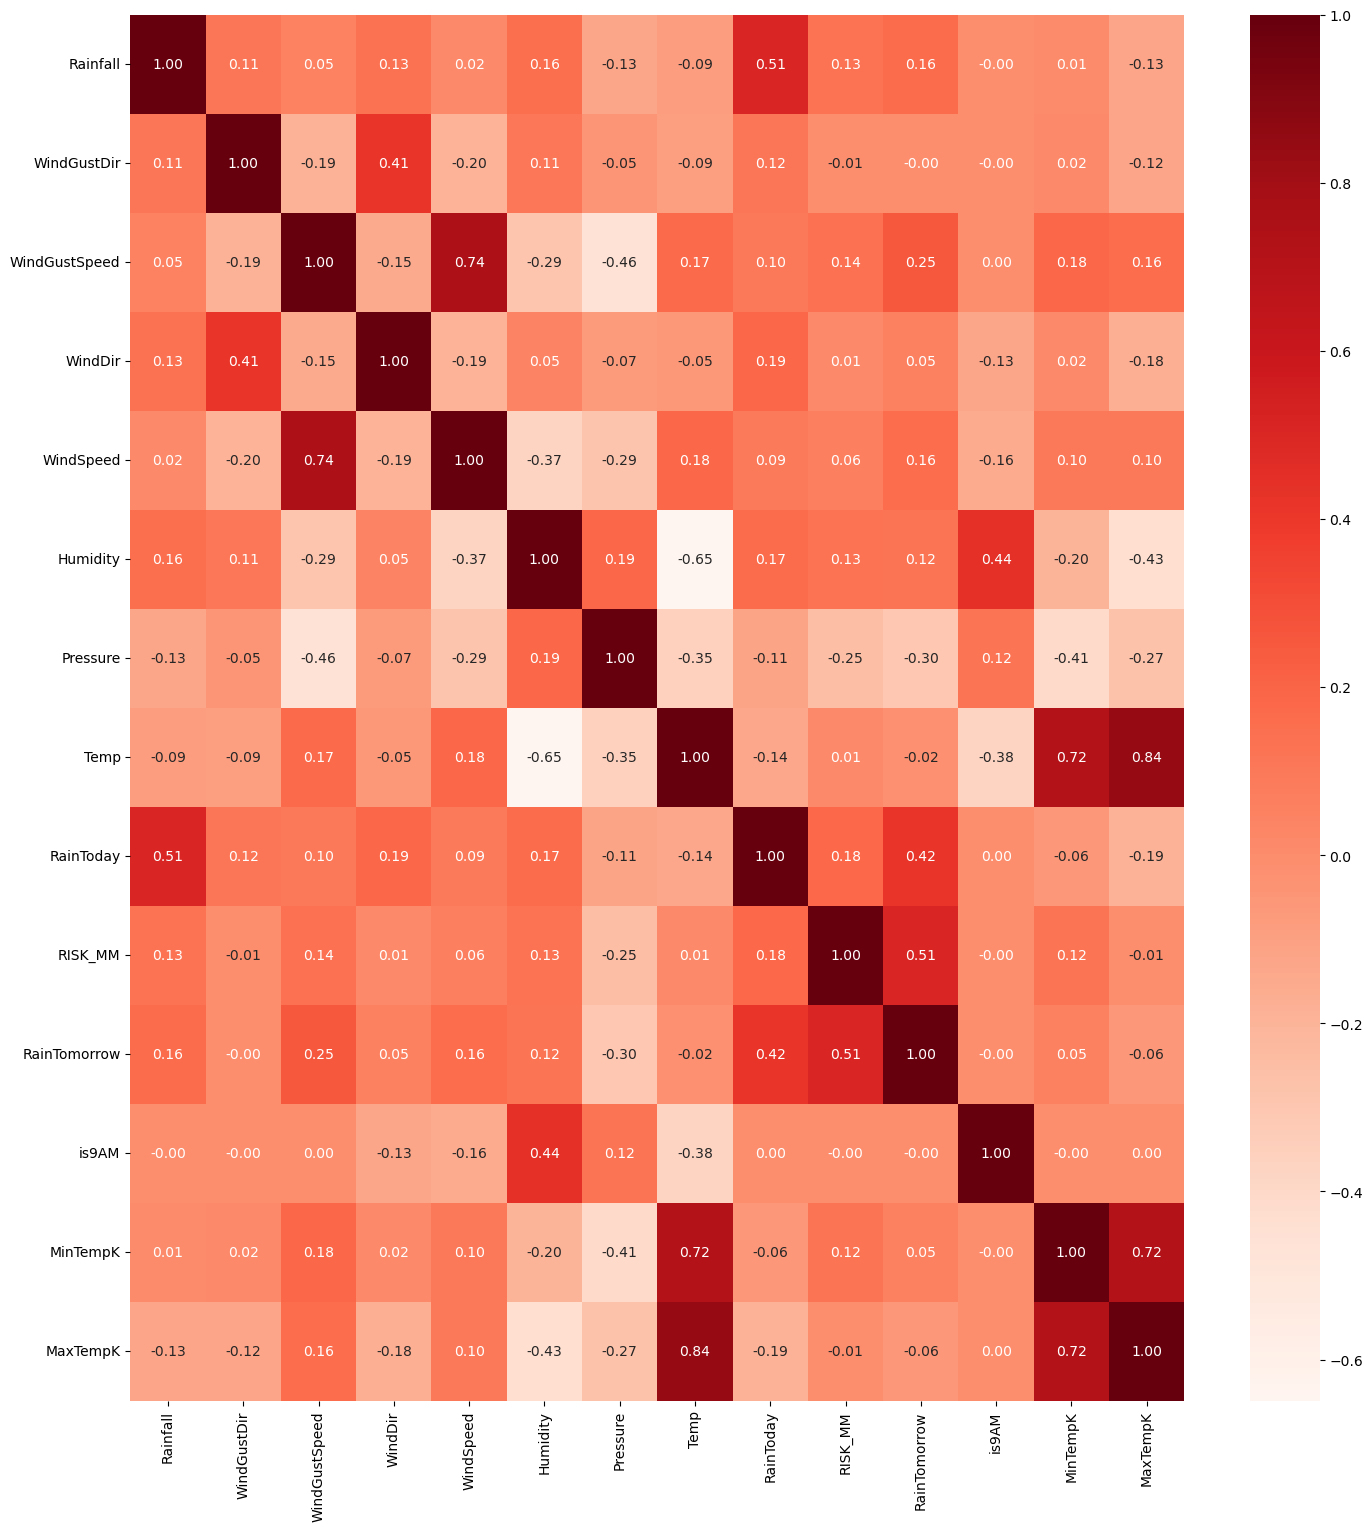

In [7]:
plt.figure(figsize=(17,18))
cor = df_melb.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')
plt.show()

In [8]:
df1= df_melb[['Rainfall', 'WindDir', 'Humidity', 'Pressure', 'Temp', 'MinTempK', "MaxTempK" ]]
df1

,Rainfall,WindDir,Humidity,Pressure,Temp,MinTempK,MaxTempK
Date,,,,,,,
2008-07-01,2.0,12.000000,60.0,1006.8,11.0,282.5,288.4
2008-07-02,0.6,12.000000,66.0,1013.4,11.8,284.0,287.5
2008-07-03,1.4,12.000000,72.0,1024.8,10.6,281.4,287.1
2008-07-04,0.6,15.000000,87.0,1030.2,10.2,282.1,287.5
2008-07-05,0.0,0.000000,81.0,1028.9,5.5,277.3,288.5
...,...,...,...,...,...,...,...
2022-08-26,0.8,9.000000,74.0,1028.0,13.1,283.0,286.6
2022-08-27,0.2,1.000000,41.0,1024.9,18.6,279.8,293.1
2022-08-28,0.0,0.000000,46.0,1020.6,20.1,280.1,293.8


In [9]:

def create_train_set(df, ycol):
    X = np.array(df.drop(columns=ycol))
    y = np.array(df[ycol])
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
    return X_train, X_test, y_train, y_test 

In [32]:

half = len(df1) // 2
dhalf = df1[:1000]
dhalf.dropna()

# dhalf= np.array(dhalf, dtype=np.float64)
#maxtemp
X_train, X_test, y_train, y_test = create_train_set(dhalf, ["MaxTempK"])

In [25]:
dhalf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2008-07-01 to 2011-03-27
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rainfall  1000 non-null   float64
 1   WindDir   1000 non-null   float64
 2   Humidity  1000 non-null   float64
 3   Pressure  1000 non-null   float64
 4   Temp      1000 non-null   float64
 5   MinTempK  1000 non-null   float64
 6   MaxTempK  1000 non-null   float64
dtypes: float64(7)
memory usage: 62.5+ KB


In [26]:
X_train.shape


(800, 6)

In [27]:
y_train.shape

(800, 1)

In [13]:
# # Number of latent dimensions (single hidden layer, since the top layer is observed)
# Q = 5

# # Define what kernels to use per layer
# kern1 = GPy.kern.RBF(Q,ARD=True) + GPy.kern.Bias(Q)
# kern2 = GPy.kern.RBF(Q,ARD=False) + GPy.kern.Bias(X_train_al.shape[1])

# # Number of inducing points to use
# num_inducing = 40

# # Whether to use back-constraint for variational posterior
# back_constraint = False

# # Dimensions of the MLP back-constraint if set to true
# encoder_dims=[[300],[150]]

In [14]:
# m = deepgp.DeepGP([y_train_al[1],Q,X_train_al.shape[1]],
#                   y_train_al= y_train_al, X_train_al=X_train_al, kernels=[kern1, kern2], 
#                   num_inducing=num_inducing, back_constraint=back_constraint)

In [15]:
# Muti-output Gaussian Process, single layers

lengthscales = np.random.rand(6)

kernel = GPy.kern.RBF(input_dim=6, variance=1, lengthscale = lengthscales, ARD= True)
 
m0 = GPy.models.GPRegression(X_train,y_train,kernel)

In [16]:
m0.optimize()
 

 /opt/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /opt/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add


In [17]:
def plot_2outputs(m, xcol, title, ycol=None):
    if ycol is None: 
        fig = pb.figure(figsize=(10,10))
        ax1 = fig.add_subplot(221)
        ax1.set_title("Test " + title + " vs Raintommorow")
        ax1.plot(X_train[:,xcol],y_train[:,0],'bx',mew=1,label='Train set')
        ax1.plot(X_test[:,xcol],y_test[:,0],'rx',mew=1,label='Test set')
        ax1.set_xlabel(title)
        ax1.set_ylabel(" Raintommorow")
        m.plot(visible_dims=[xcol],which_data_ycols=[0], ax=ax1, plot_raw=True, legend = False)

        ax2 = fig.add_subplot(222)
        ax2.set_title("Test " + title + " vs MaxTempK")
        ax2.plot(X_train[:xcol],y_train[:,1],'bx',mew=1,label='Train set')
        ax2.plot(X_test[:,xcol],y_test[:,1],'rx',mew=1,label='Test set')
        ax2.set_xlabel(title)
        ax2.set_ylabel("MaxTempk")
        m.plot(visible_dims=[0], which_data_ycols=[1], ax = ax2, legend = False, plot_raw = True)

    
    else: 
#         y_pred = m.predict(X_test)
        fig = pb.figure(figsize=(10,10))
        ax1 = fig.add_subplot(221)
        ax1.set_title("Test " + title + " vs " + ycol)
        ax1.set_xlabel(title)
        ax1.set_ylabel(ycol)
        if ycol == "MaxtempK": 
            
            ax1.plot(X_train[:,xcol],y_train[:,1],'bx',mew=1,label='Train set')
            ax1.plot(X_test[:,xcol],y_test[:, 1],'rx',mew=1,label='Test set')
        else: 
            ax1.plot(X_train[:,xcol],y_train[:,0],'bx',mew=1,label='Train set')
            ax1.plot(X_test[:,xcol],y_test[:, 0],'rx',mew=1,label='Test set')
        
        m.plot(visible_dims=[xcol],ax=ax1, plot_raw=True, legend = False)

In [18]:
def model_visualization(m0, ind, xvar, yvar=None):
    print (m0)
    if yvar is None: 
        fig = pb.figure(figsize=(10,10))
        ax1 = fig.add_subplot(221)
        ax1.set_title("Training " + xvar + " Raintommorow")
        ax1.set_xlabel(xvar)
        ax1.set_ylabel("vs Raintommorow")
        m0.plot(visible_dims=[ind], which_data_ycols=[0], ax = ax1, legend = False, plot_raw = True) 

        ax2 = fig.add_subplot(222)
        ax2.set_title("Training " + xvar + " vs Maxtemp")
        ax2.set_xlabel(xvar)
        ax2.set_ylabel("vs Maxtemp")
        m0.plot(visible_dims=[ind], which_data_ycols=[1], ax = ax2, legend = False, plot_raw = True)
        plot_2outputs(m0, ind, xvar)
    
    else: 
        fig = pb.figure(figsize=(10,10))
        ax1 = fig.add_subplot(221)
        ax1.set_title("Training " + xvar + " vs " + yvar)
        ax1.set_xlabel(xvar)
        ax1.set_ylabel(yvar)
        m0.plot(visible_dims=[ind], ax = ax1, legend = False, plot_raw = True)
        plot_2outputs(m0, ind, xvar, yvar)
        


Name : GP regression
Objective : 2055.02002587903
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1535.5982791401775  |      +ve      |        
  rbf.lengthscale          |                (6,)  |      +ve      |        
  Gaussian_noise.variance  |   8.603039669158035  |      +ve      |        


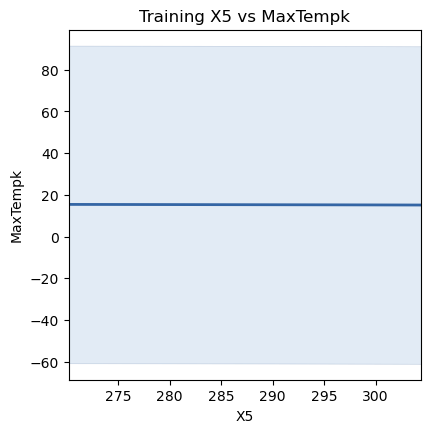

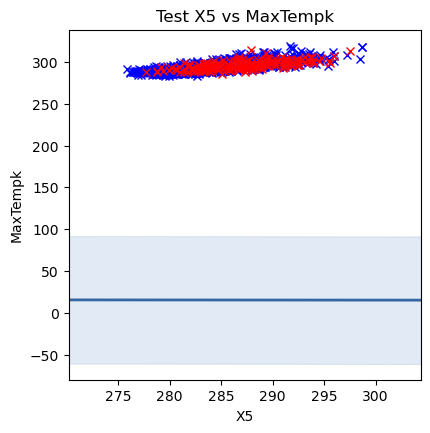

In [19]:
model_visualization(m0, 5, "X5", "MaxTempk" )